# Hydropandas Objects

In the HydroPandas Python package, the Obs and ObsCollection classes are designed to handle time series data related to hydrological observations.

The Obs class represents a single time series of measurements at a specific location, such as groundwater levels or precipitation amounts. It is a subclass of the pandas DataFrame, enriched with additional attributes and methods for the type of observation it holds. There are specialized subclasses of Obs for different measurement types, including:

- GroundwaterObs: for groundwater measurements
- WaterQualityObs: for (ground)water quality measurements
- WaterlvlObs: for surface water level measurements
- ModelObs: for observations from a MODFLOW model
- MeteoObs: for meteorological observations
- PrecipitationObs: for precipitation observations (subclass of MeteoObs)
- EvaporationObs: for evaporation observations (subclass of MeteoObs)

Each of these subclasses is essentially a pandas DataFrame with additional methods and attributes related to the type of measurement it holds. 

The ObsCollection class represents a collection of Obs objects, such as multiple groundwater level time series within a certain area. It is also a subclass of the pandas DataFrame, where each row contains metadata (e.g., coordinates of the observation point) and the corresponding Obs object that holds the measurements. Both Obs and ObsCollection classes include methods for reading data from various sources, facilitating the management and analysis of hydrological time series data.

## <a id=top></a>Notebook contents

1. [Obs](#Obs)
2. [ObsCollection](#ObsCollection)

In [1]:
import numpy as np
import pandas as pd

import hydropandas as hpd

hpd.util.get_color_logger("INFO")

<RootLogger root (INFO)>

## Obs<a id=GroundwaterObs></a>

Creating an `Obs` object is very similar to creating a `DataFrame`. Below we create 3 differente Obs objects:
- an empty Obs
- an Obs with only metadata 
- an Obs with metadata and measurements

In [2]:
# create an empty Obs object
o1 = hpd.Obs(name="my empty obs")
display(o1)

Obs my empty obs
-----metadata------
name : my empty obs 
x : nan 
y : nan 
location :  
filename :  
source :  
unit :  

-----time series------
Empty Obs
Columns: []
Index: []

In [3]:
# create an Obs object with only metadata
o2 = hpd.Obs(
    name="my_observation",
    x=10,
    y=20,
    location="somewhere",
    filename="unknown",
    source="imagination",
    unit="m",
)
display(o2)

Obs my_observation
-----metadata------
name : my_observation 
x : 10 
y : 20 
location : somewhere 
filename : unknown 
source : imagination 
unit : m 

-----time series------
Empty Obs
Columns: []
Index: []

In [4]:
# create an Obs object with both metadata and measurements
meas_df = pd.DataFrame(
    index=pd.date_range(start="2020-01-01", periods=10, freq="D"),
    data={"value": np.random.rand(10)},
)
o3 = hpd.Obs(
    meas_df,
    name="smw",
    x=1000,
    y=22220,
    location="somewhere else",
    source="advanced imagination",
    unit="m",
)
display(o3)

,smw
x,1000
y,22220
location,somewhere else
filename,
source,advanced imagination
unit,m
,value
2020-01-01,0.523743
2020-01-02,0.446970
2020-01-03,0.066764


#### Obs metadata

Access observation metadata as attributes.

In [5]:
print(f"x coordinate of observation 1: {o1.x}")
print(f"x coordinate of observation 2: {o2.x}")
print(f"x coordinate of observation 3: {o3.x}")

x coordinate of observation 1: nan
x coordinate of observation 2: 10
x coordinate of observation 3: 1000


In [6]:
print(f"source of observation 1 is : {o1.source}")
print(f"location of observation 2 is : {o2.location}")
print(f"name of observation 3 is : {o3.name}")

source of observation 1 is : 
location of observation 2 is : somewhere
name of observation 3 is : smw


#### Obs measurements

Access observation measurements as if the observation is a DataFrame with the measurements.

In [7]:
display(o3["value"])  # show measurements

2020-01-01    0.523743
2020-01-02    0.446970
2020-01-03    0.066764
2020-01-04    0.167922
2020-01-05    0.396479
2020-01-06    0.681373
2020-01-07    0.997011
2020-01-08    0.514300
2020-01-09    0.472107
2020-01-10    0.265559
Freq: D, Name: value, dtype: float64

In [8]:
perc85 = o3["value"].quantile(0.85)  # get percentile
print(f"the 85th percentile of my measurements is {perc85:.2f} {o3.unit}")

the 85th percentile of my measurements is 0.63 m


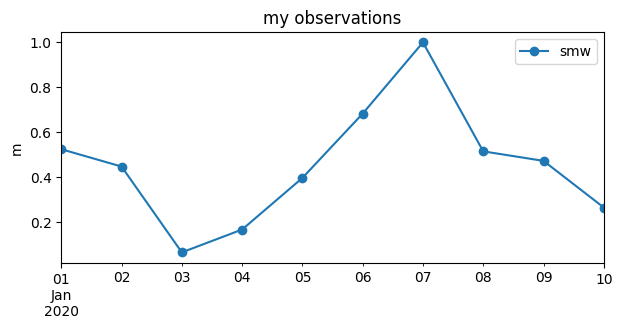

In [26]:
o3["value"].plot(
    figsize=(7, 3),
    label=o3.name,
    ylabel=o3.unit,
    marker="o",
    legend=True,
    title="my observations",
);  # plot measurements

#### Obs types

Different Obs types have differente metadata. Groundwater observations have some extra properties `screen_top`, `screen_bottom`, `ground_level`, `tube_top` and `metadata_available`.

In [10]:
gw_obs = hpd.GroundwaterObs(
    o3,
    name="smw_pb1",
    tube_nr=1,
    screen_top=-5,
    screen_bottom=-6,
    unit="m NAP",
    ground_level=3,
    tube_top=2.95,
    metadata_available=True,
)  # create a GroundwaterObs object from the Obs object
display(gw_obs)

,smw_pb1
x,1000
y,22220
location,somewhere else
filename,
source,advanced imagination
unit,m NAP
tube_nr,1
screen_top,-5
screen_bottom,-6
ground_level,3


#### Reading/writing Obs

Observations can be saved as a pickle file for later use.

In [11]:
# save the object to a pickle file
gw_obs.to_pickle("my_gw_obs.pklz")

In [12]:
# read the object from a pickle file
gw_obs2 = hpd.read_pickle("my_gw_obs.pklz")

In [13]:
gw_obs2.equals(gw_obs)  # check if the two objects are equal

True

## ObsCollection<a id=ObsCollection></a>

An ObsCollection is a structured way to manage and analyze multiple time series of hydrological observations. It serves as a container for multiple Obs objects, which represent individual time series of measurements, such as groundwater levels, precipitation, or water quality.

Each row in an ObsCollection contains metadata (e.g., location, station name) and a corresponding Obs object holding the time series data. This structure allows for easy comparison, filtering, and statistical analysis across multiple observation sites.

In [14]:
# create an empty ObsCollection
oc = hpd.ObsCollection()
print(oc)

Empty ObsCollection
Columns: []
Index: []


In [15]:
# create an ObsCollection with a single Obs object
oc = hpd.ObsCollection(o3)
oc

,x,y,location,filename,source,unit,obs
name,,,,,,,
smw,1000,22220,somewhere else,,advanced imagination,m,Obs smw -----metadata------ name : smw x : 10...


In [16]:
# create an ObsCollection with multiple Obs objects
oc = hpd.ObsCollection([o1, o2, o3])
oc

,x,y,location,filename,source,unit,obs
name,,,,,,,
my empty obs,NaN,NaN,,,,,Obs my empty obs -----metadata------ name : my...
my_observation,10.0,20.0,somewhere,unknown,imagination,m,Obs my_observation -----metadata------ name : ...
smw,1000.0,22220.0,somewhere else,,advanced imagination,m,Obs smw -----metadata------ name : smw x : 10...


#### ObsCollection metadata

Access the metadata using the standard DataFrame methods.

In [17]:
print(f"the x coordinate of observation 2 is: {oc.loc['my_observation', 'x']}")
print(f"the location of observation 3 is: {oc.loc['smw', 'location']}")

the x coordinate of observation 2 is: 10.0
the location of observation 3 is: somewhere else


#### ObsCollection observations

Access the Obs objects from the collection

In [18]:
o3_1 = oc.loc["smw", "obs"]  # using the loc method
o3_2 = oc.get_obs("smw")  # using the get_obs method with the name
o3_3 = oc.get_obs(
    location="somewhere else"
)  # using the get_obs method with the location (only works if the location is unique)
id(o3_1) == id(o3_2) == id(o3_3)  # check if the three objects are the same

True

#### Slice ObsCollection

Filter and slice ObsCollections

In [19]:
oc.loc[oc["y"] > 10]  # Selection based on the y coordinate

,x,y,location,filename,source,unit,obs
name,,,,,,,
my_observation,10.0,20.0,somewhere,unknown,imagination,m,Obs my_observation -----metadata------ name : ...
smw,1000.0,22220.0,somewhere else,,advanced imagination,m,Obs smw -----metadata------ name : smw x : 10...


In [20]:
oc.loc[oc["source"].str.contains("advanced")]  # Selection based on the location

,x,y,location,filename,source,unit,obs
name,,,,,,,
smw,1000.0,22220.0,somewhere else,,advanced imagination,m,Obs smw -----metadata------ name : smw x : 10...


#### Read/write an ObsCollection

An ObsCollection can be written to an excel file or a pickle file. Writing to and reading from an excel file slightly alters the properties, just like writing and reading a DataFrame to/from excel would do. Reading/writing a pickle does not change anything 

In [21]:
oc.to_excel("my_obs_collection.xlsx")  # write to excel
oc.to_pickle("my_obs_collection.pklz")  # write to pickle

In [22]:
# read excel file
oc2 = hpd.read_excel("my_obs_collection.xlsx")
oc2

,x,y,location,filename,source,unit,obs
name,,,,,,,
my empty obs,NaN,NaN,NaN,NaN,NaN,NaN,Obs my empty obs -----metadata------ name : my...
my_observation,10.0,20.0,somewhere,unknown,imagination,m,Obs my_observation -----metadata------ name : ...
smw,1000.0,22220.0,somewhere else,NaN,advanced imagination,m,Obs smw -----metadata------ name : smw x : 10...


In [23]:
# read pickle
oc2 = hpd.read_pickle("my_obs_collection.pklz")
oc2

,x,y,location,filename,source,unit,obs
name,,,,,,,
my empty obs,NaN,NaN,,,,,Obs my empty obs -----metadata------ name : my...
my_observation,10.0,20.0,somewhere,unknown,imagination,m,Obs my_observation -----metadata------ name : ...
smw,1000.0,22220.0,somewhere else,,advanced imagination,m,Obs smw -----metadata------ name : smw x : 10...


#### Extensions

To enhance the functionality of an ObsCollection, HydroPandas provides several extensions that add specialized methods for visualization, spatial analysis, and data processing. Some key extensions include:

- Plot Extension (ObsCollection.plot): Built-in plotting capabilities for visualizing time series data. Users can generate time series plots for individual or multiple observations, histograms, and other graphical representations to analyze trends and patterns in hydrological data.
- Geo Extension (ObsCollection.geo): Spatial analysis by integrating with geopandas. It allows users to obtain the extent of an ObsCollection, convert to another coordinate reference system and find nearby geometries.
- Groundwater Obs (ObsCollection.gwobs): Analyse and process groundwater observations. Users can find the REGIS layer of each tube and set the tube number based on the screen depth.
- Statistics (ObsCollection.stats): Statistical analysis of the observations. Users can obtain the number of consecutive years with more than 10 observations or find seasonal minimum and maximum values.




In [24]:
oc.stats.get_first_last_obs_date()  # get the first and last observation date using the stats extension

,date_first_measurement,date_last_measurement
name,,
my empty obs,NaT,NaT
my_observation,NaT,NaT
smw,2020-01-01,2020-01-10


In [25]:
oc.geo.get_extent()  # get the extent of the observations using the geo extension

(10.0, 1000.0, 20.0, 22220.0)